In [1]:
import os
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:

def extract_messages_from_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    messages = re.findall(r'<p>(.*?)</p>', content)
    return messages

def extract_messages_from_folder(folder_path):
    all_messages = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.html'):
            file_path = os.path.join(folder_path, filename)
            messages = extract_messages_from_html(file_path)
            all_messages.extend(messages)
    return all_messages

def generate_wordcloud(text):
    # Process the text to get word frequencies
    word_list = text.split()
    # Remove words that contain '@', '[', '&', and ')'
    filtered_word_list = [word for word in word_list if '@' not in word and '[' not in word and '&' not in word and ')' not in word]

    # Calculate word frequencies
    word_freq = {word: filtered_word_list.count(word) for word in set(filtered_word_list)}

    # Balance the word frequencies: Cap them at 40
    word_freq = {word: min(freq, 15) for word, freq in word_freq.items()}

    # Additional stopwords
    # Manually set the frequency of certain words
    # word_freq['太难'] = 60
    # word_freq['黄蕉'] = 40
    # word_freq['还我血汗钱！！！'] = 20
    # Define a list of words to remove
    stopwords_add = ['why', 'why:', '图片','[图片]','带有引用的文本消息','解析失败','[带有引用的文本消息]解析失败','解析失败[图片]','撤回了一条消息&lt;/revokemsg&gt;',
                 '[破涕为笑]','[偷笑]','[呲牙]','哈','哈哈','哈哈哈','哦哦','是的','嗯','哎','哼!!','[捂脸]','[阴险]','[强]', '=', '是啊', '我去', '拍了拍', '拍了拍我', 
                 '对对对', '不行', '好吧', '恩', '嗯', '国企王总', '没有', '不知道', '可以', '真好', '对的', '?', '羡慕', '牛逼', '啧啧啧', '真的', '假的', '就是', 
                 '可以的', '我擦', '老王', '50', '不会', '不是', '6', '收', '正常', '卧槽', '不错', 'you', '对啊', 'love', '有用', '不要', '不行', '不行啊', '不行不行',
                 '算了', 'time', '30', '嗯呢', '确实', '谢谢', '嗯嗯', '邻居们', '各位高邻']
    
    with open("baidu_stopwords.txt", 'r',encoding='utf-8') as file:
        stopwords = file.read().split()
    # Remove the stop words from the frequencies dictionary
    for word in stopwords:
        word_freq.pop(word, None)
    for word in stopwords_add:
        word_freq.pop(word, None)
    # Create a word cloud using the custom font
    wordcloud = WordCloud(font_path='STXINGKA.TTF', width=2000, height=1000, background_color="white").generate_from_frequencies(word_freq)
    # Plot the word cloud

    plt.figure(figsize = (20,10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()


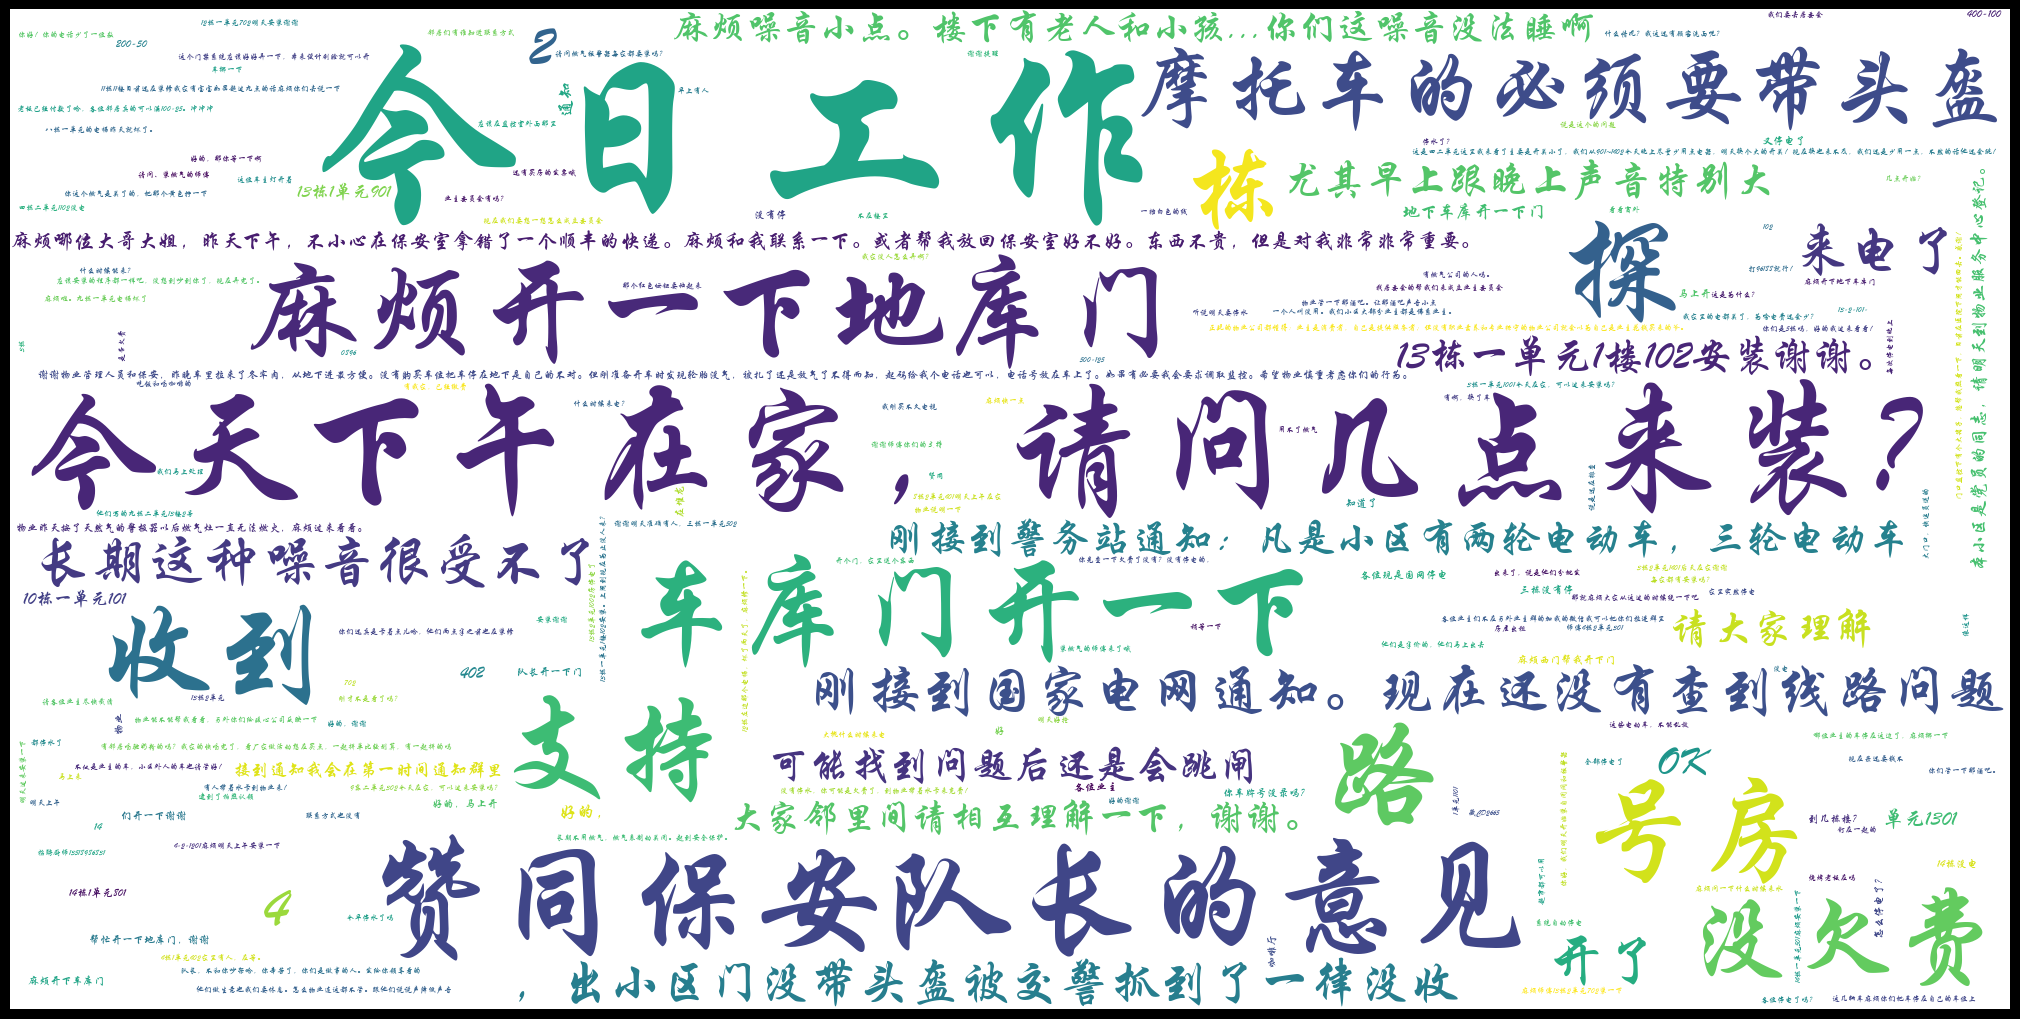

In [3]:

# 替换以下路径为您的文件夹路径
folder_path = r'D:\Downloads\export\25361401114@chatroom_东嘎一品业主群_'
extracted_messages = extract_messages_from_folder(folder_path)

# 将所有消息合并为一个长字符串，用于生成词云
combined_messages = ' '.join(extracted_messages)
generate_wordcloud(combined_messages)


In [4]:
extracted_messages

['&#34;东嘎一品物业18089994865&#34;邀请&#34;YonTenTaShi&#34;加入了群聊',
 '&#34;可口☞不可乐                                           .&#34;邀请&#34;Ge&amp;曲&#34;加入了群聊',
 '&#34;Ge&amp;曲&#34;与群里其他人都不是朋友关系，请注意隐私安全',
 '&#34;哈梅斯-罗德里格斯&#34;邀请&#34;\ue51fBian\ue003,zhuo\ue115&#34;加入了群聊',
 '&#34;\ue51fBian\ue003,zhuo\ue115&#34;与群里其他人都不是朋友关系，请注意隐私安全',
 '&lt;revokemsg&gt;&#34;洋湖云旦拉水泥联系17708984490&#34; 撤回了一条消息&lt;/revokemsg&gt;',
 '@东嘎物业\u2005请物业管管那酒吧。声音都大的不得了',
 '请车主联系我一下',
 '@队长\u2005请开一下后门',
 '本店推出羊肉汤，欢迎新老客户光临',
 '各位，本小区出租一套，159平四室两厅两卫，新装修，首次出租，采光好，随时可以看房。有意者联系:133 0896 3636',
 '队长开地下门',
 '好的，马上开',
 '你好！你的电话少了一位数',
 '@十栋901\u2005电话？',
 '我是说审车买保险的手机号少了一位',
 '[捂脸][捂脸]',
 '烧烤老板在吗',
 '老板已经付款了哈，各位邻居真的可以满100-25。冲冲冲',
 '[带有引用的文本消息]解析失败',
 '请问停水了吗',
 '不会停水可能是欠费了，明天早上来物业充费！',
 '没有停水',
 '好的，谢谢',
 '麻烦开下地库闸门',
 '开不开',
 '开了',
 '&lt;revokemsg&gt;&#34;ཅི་བསམ་དོན་གྲུབ།&#34; 撤回了一条消息&lt;/revokemsg&gt;',
 '我们房产证到底多久能出来？哪位了解？？',
 '上次问了，说是12月底能拿到',
 '好的，谢谢了。',
 '物业 麻烦啦。九栋一单元电梯坏了',
 '收到！谢谢你！马上修。',
 '9栋1单元，这个电梯正常了！',
 '&#34;9栋&#34;邀请&#